# In this notebook

- Rigorous cross-validation & model selection + test on a new scaffold of OLS model.
- Test interaction between structural elements.

# Getting started

In [362]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run nnn/ipynb_init.py
import explore_fig as ef

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 432x288 with 0 Axes>

# Fitting dH model with line fit dH values instead

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


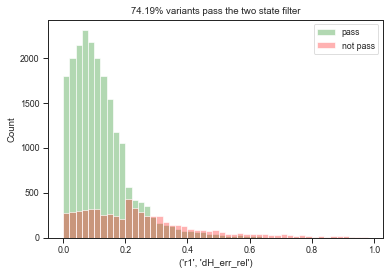

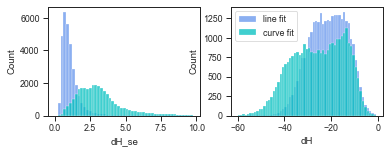

In [86]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')

arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                    annotation_file=annotation_file)

myfilter = "dH_err_rel < 0.2 & Tm_err_abs < 2 & redchi < 1.5 & n_inlier > 10"
pass_df = arraydata.filter_two_state(min_rep_pass=2, force_recalculate=True, overwrite_dH=False, myfilter=myfilter)

variant_filter = 'Tm < 55 & Tm > 25'
arr = arraydata.data.join(arraydata.annotation).query(variant_filter)
arr['scaffold'] =arr.apply(lambda row: f'{row.bottomScaffold}_{row.topScaffold}', axis=1)

In [4]:
arr.to_csv('./data/fitted_variant/arr.csv', sep='\t')

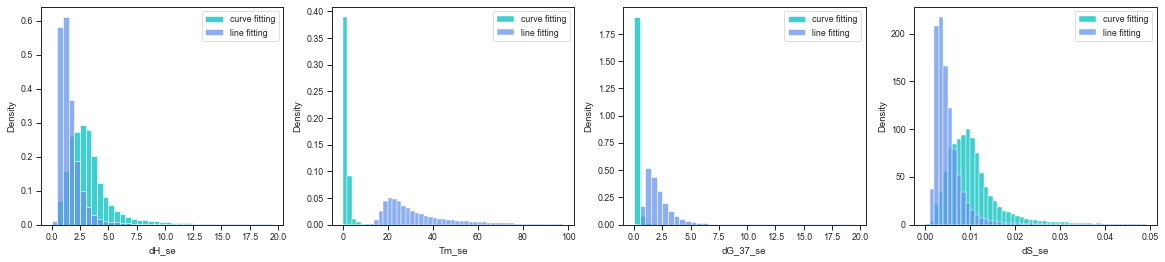

In [61]:
# why only overwrite dH
fig, ax = plt.subplots(1,4,figsize=(20,4))
for i,p in enumerate(params):
    
    if p == 'Tm':
        bins = np.arange(0,100,2)
    elif p == 'dS':
        bins = np.arange(0,0.05,0.001)
    else:
        bins = np.arange(0,20,.5)
    
    sns.histplot(arr[p+'_se'], bins=bins, stat='density', kde=False, label='curve fitting', color='c', ax=ax[i])
    sns.histplot(df[p+'_se'], bins=bins, stat='density', kde=False, label='line fitting', color='cornflowerblue', ax=ax[i])
    ax[i].legend()
# plt.xlim([0,100])

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


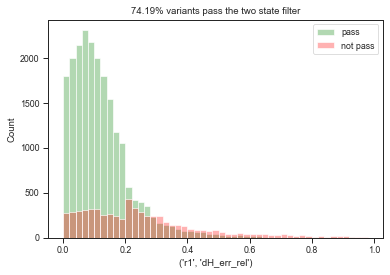

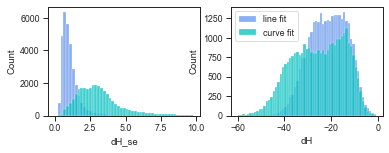

known_param_mask:  10 ['AA_TT', 'AC_GT', 'AG_CT', 'AT_AT', 'CA_TG', 'CC_GG', 'CG_CG', 'GA_TC', 'GC_GC', 'TA_TA']
A_unknown, A_known:  (693, 64) (693, 10)
x_known:  (10,)
known_param_mask:  10 ['AA_TT', 'AC_GT', 'AG_CT', 'AT_AT', 'CA_TG', 'CC_GG', 'CG_CG', 'GA_TC', 'GC_GC', 'TA_TA']
A_unknown, A_known:  (693, 64) (693, 10)
x_known:  (10,)


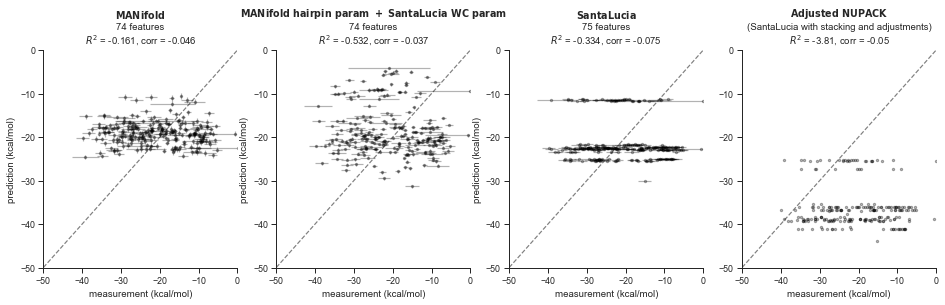

In [135]:
ef.plot_triloop_linear_model(param='dH')

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


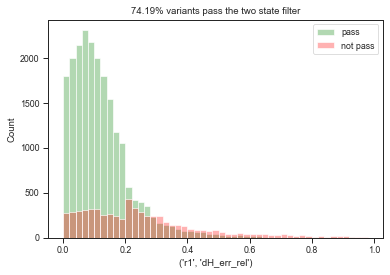

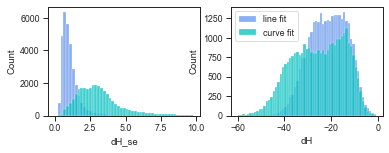

known_param_mask:  10 ['AA_TT', 'AC_GT', 'AG_CT', 'AT_AT', 'CA_TG', 'CC_GG', 'CG_CG', 'GA_TC', 'GC_GC', 'TA_TA']
A_unknown, A_known:  (693, 64) (693, 10)
x_known:  (10,)
known_param_mask:  10 ['AA_TT', 'AC_GT', 'AG_CT', 'AT_AT', 'CA_TG', 'CC_GG', 'CG_CG', 'GA_TC', 'GC_GC', 'TA_TA']
A_unknown, A_known:  (693, 64) (693, 10)
x_known:  (10,)


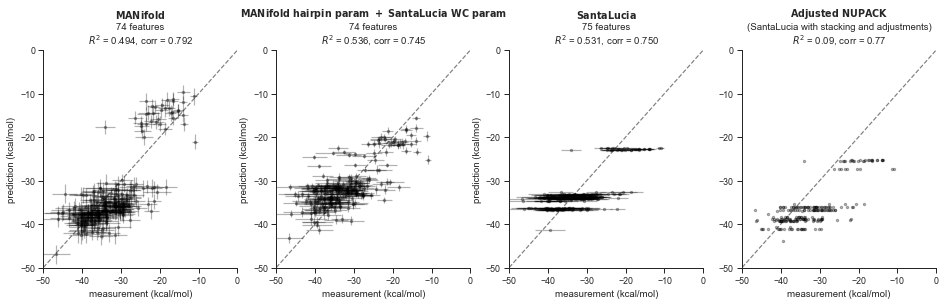

In [138]:
ef.plot_triloop_linear_model(param='dH')

## Conclusion

The line-fit dH is very useless unless specifically optimized. (no priority)

# Linear Regression Baseline

In [92]:
arr, data_split_dict = fileio.read_ml_data('./data/models/raw', append_2_arr=True)

## Test feature extractors

In [141]:
arr.query('Series == "TRIloop" & data_split == "train"').sort_values('dH_se')

,dH,dH_se,dH_lb,dH_ub,Tm,Tm_se,Tm_lb,Tm_ub,dG_37,dG_37_se,...,dG_37_NUPACK,dG_37_ensemble_150mM_NUPACK,dG_37_ensemble_75mM_NUPACK,GC,Tm_NUPACK_salt_corrected,dG_37_NUPACK_salt_corrected,dH_NUPACK_salt_corrected,dS_NUPACK_salt_corrected,scaffold,data_split
SEQID,,,,,,,,,,,,,,,,,,,,,
TRINN147,-11.771060,0.685571,-14.992353,-9.781517,51.850083,2.168007,43.536979,58.819991,-0.545708,0.071070,...,-2.75,-2.373610,-2.120203,81.818182,61.124623,-2.049630,-28.4,-0.082702,GCGC_nan,train
TRINN51,-11.287931,0.715773,-14.235472,-9.451224,46.167861,1.949495,38.290114,52.651040,-0.337037,0.061571,...,-2.16,-2.063840,-1.835210,72.727273,54.798353,-1.432776,-26.4,-0.078156,GCGC_nan,train
TRINN179,-9.672975,0.731500,-12.452854,-7.428978,45.560741,2.614891,36.544403,54.740646,-0.244975,0.072356,...,-2.75,-2.425952,-2.182041,90.909091,61.836073,-2.105593,-28.4,-0.082702,GCGC_nan,train
TRINN163,-10.886252,0.823503,-14.468442,-8.801742,52.333433,2.248839,43.302693,60.078676,-0.503087,0.065901,...,-2.75,-2.385602,-2.134395,90.909091,61.836073,-2.105593,-28.4,-0.082702,GCGC_nan,train
TRINN30,-14.090686,0.854843,-17.450272,-11.899993,45.592298,1.660024,39.527965,51.934752,-0.386470,0.067752,...,-2.16,-2.051461,-1.818697,72.727273,54.798353,-1.432776,-26.4,-0.078156,GCGC_nan,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRINNN679,-55.335571,5.590160,-82.167017,-39.125859,47.836815,0.418137,46.759506,49.222392,-2.023104,0.133948,...,-3.99,-3.615383,-3.247092,66.666667,59.073695,-2.803864,-42.2,-0.123198,GATCGATC_nan,train
TRINNN860,-38.803385,5.823407,-59.315368,-26.541505,41.848032,0.763579,40.245203,43.932066,-0.656022,0.100885,...,-3.05,-2.963643,-2.619632,46.666667,52.821808,-1.805589,-37.2,-0.110108,GATCGATC_nan,train
TRINNN926,-44.497135,5.887862,-60.585313,-30.852460,48.510098,0.618150,47.118005,49.924461,-1.705493,0.180666,...,-3.99,-3.524539,-3.148167,66.666667,59.073695,-2.803864,-42.2,-0.123198,GATCGATC_nan,train


In [262]:
# test hairpin regular expression
import re
pattern = re.compile(r'^\([.]+\)')
z = pattern.match('(..(..)')
if z:
    print('hairpin')
else:
    print('not hairpin')

not hairpin


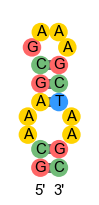

Error, start_index > end_index
invalid RGV


RuntimeError: invalid RGV

In [380]:
from nnn.feature_list import *
# row = arr.loc['MMACP3115',:]
row = arr.loc['MMTM0',:]
# row = arr.loc['TRINN147',:]
draw_struct(row['RefSeq'], row['TargetStruct'])
feat_list = get_feature_list(row, sep_base_stack=True)

print(feat_list)
plot_elements(feat_list)

In [160]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(token_pattern=r"\b[ATCGxy().+_]+\s", lowercase=False)
feat_count = cv.fit_transform([' '.join(feats)+' ']).toarray()
feat_name = [x.strip() for x in cv.get_feature_names_out()]
print(feats)
print(feat_name, feat_count)

['GTAGC_(...)', 'GG+CC_((+))', 'CG+CG_((+))', 'GC+GC_((+))', 'xG+Cy_((+))']
['CG+CG_((+))', 'GC+GC_((+))', 'GG+CC_((+))', 'GTAGC_(...)', 'xG+Cy_((+))'] [[1 1 1 1 1]]


In [270]:
%%time
feat_list = arr.iloc[:5,:].apply(lambda row: get_feature_list(row, fit_intercept=True, symmetry=False, sep_base_stack=True), axis=1)

CPU times: user 5.51 ms, sys: 657 µs, total: 6.17 ms
Wall time: 6.14 ms


## Linear regression

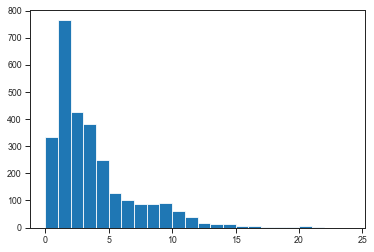

In [274]:
plt.hist(np.sum(train_data['X'], axis=0), bins=np.arange(25))
plt.show()

All of the features appear at least once in training data. However, the rank of X 2882 is smaller than the number of features 2886.

In [177]:
set(feats.columns) - set(train_data['feature_names'])

set()

In [356]:
def get_X_y(arr, split_dict, param, feats=None, split='train'):
    """
    Returns:
        feats - DataFrame, needs .values when fed into LinearRegressionSVD
    """
    assert split_dict is not None
    seqids = split_dict[split+'_ind']
    if feats is not None:
        X = feats.loc[seqids, :].values
    else:    
        feats = mf.get_feature_count_matrix(arr, feature_method='get_feature_list', 
                                            fit_intercept=False, symmetry=False)
        X = feats.values
    df = arr.loc[seqids, :]
    y = df[param].values
    y_err = df[param+'_se'].values
    
    return dict(X=X, y=y, y_err=y_err, feature_names=feats.columns.tolist(), param=param, split=split)

In [445]:
# compressing rare features
min_freq = 2
rare_feats = pd.Series(feats.columns[np.sum(feats, axis=0) < min_freq])
rare_feats_struct = rare_feats.apply(lambda x: x.split('_')[1])
feats_compact = feats.loc[:, np.sum(feats, axis=0) >= min_freq]
feats_rare = feats.loc[:, np.sum(feats, axis=0) < min_freq].sparse.to_dense()
rare_struct_unique = np.unique(rare_feats_struct)
feats_tmp = pd.DataFrame(index=feats.index, columns=rare_struct_unique, data=0, dtype=int)

for i, rare_feat in enumerate(rare_feats):
    feats_tmp[rare_feats_struct[i]] += feats_rare.loc[:, rare_feat]
    
feats_compact = pd.concat((feats_compact, feats_tmp), axis=1)

# Doesn't work well

In [448]:
%%time
arr, data_split_dict = fileio.read_ml_data('./data/models/raw', append_2_arr=True)
feats = mf.get_feature_count_matrix(arr, feature_method='get_feature_list', 
                                    fit_intercept=False, symmetry=False, sep_base_stack=True)
print(feats.shape)

(19696, 1331)
CPU times: user 14.1 s, sys: 110 ms, total: 14.2 s
Wall time: 14.2 s


CPU times: user 1min 17s, sys: 45.2 s, total: 2min 2s
Wall time: 37.5 s


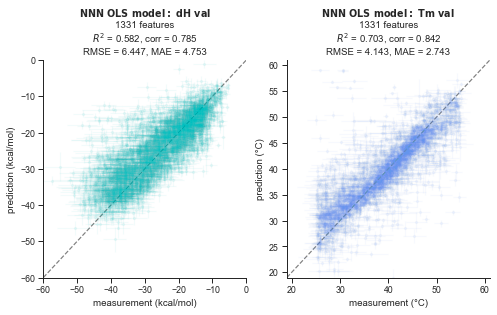

In [449]:
%%time

def fit_param(arr, data_split_dict, param, feats, ax):
    color_dict = dict(dH='c', Tm='cornflowerblue')
    train_data = get_X_y(arr, data_split_dict, param=param, feats=feats, split='train')
    val_data = get_X_y(arr, data_split_dict, param=param, feats=feats, split='val')
    
    lr = util.LinearRegressionSVD()
    lr.fit(train_data['X'], train_data['y'], train_data['y_err'], feature_names=train_data['feature_names'],
           skip_rank=False)
    
    plotting.plot_truth_predict(lr, val_data, ax=ax, title='NNN OLS model',
                            color=color_dict[param], alpha=.05)
    
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fit_param(arr, data_split_dict, param='dH', feats=feats, ax=ax[0])
fit_param(arr, data_split_dict, param='Tm', feats=feats, ax=ax[1])

util.save_fig('./fig/models/ols/validation_220824_sep_base_stack_mm_asym.pdf', fig)

CPU times: user 1min 16s, sys: 46.2 s, total: 2min 2s
Wall time: 34.4 s


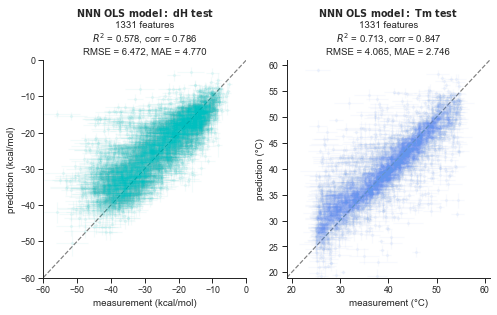

In [450]:
%%time

def fit_param(arr, data_split_dict, param, feats, ax, mode='val'):
    color_dict = dict(dH='c', Tm='cornflowerblue')
    train_data = get_X_y(arr, data_split_dict, param=param, feats=feats, split='train')
    val_data = get_X_y(arr, data_split_dict, param=param, feats=feats, split=mode)
    
    lr = util.LinearRegressionSVD()
    lr.fit(train_data['X'], train_data['y'], train_data['y_err'], feature_names=train_data['feature_names'],
           skip_rank=False)
    
    plotting.plot_truth_predict(lr, val_data, ax=ax, title='NNN OLS model',
                            color=color_dict[param], alpha=.05)
    
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fit_param(arr, data_split_dict, param='dH', feats=feats, ax=ax[0], mode='test')
fit_param(arr, data_split_dict, param='Tm', feats=feats, ax=ax[1], mode='test')

util.save_fig('./fig/models/ols/test_220824_sep_base_stack_sym.pdf', fig)

CPU times: user 1min 16s, sys: 46.1 s, total: 2min 2s
Wall time: 35.8 s


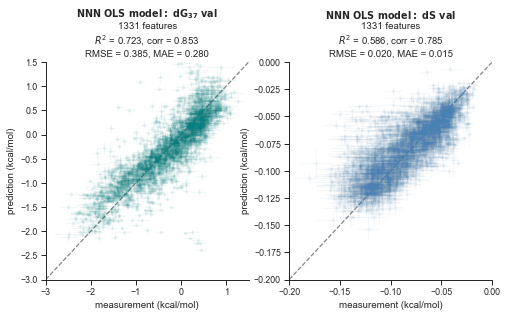

In [453]:
%%time

def fit_param(arr, data_split_dict, param, feats, ax, mode='val'):
    color_dict = dict(dH='c', Tm='cornflowerblue', dG_37='teal', dS='steelblue')
    train_data = get_X_y(arr, data_split_dict, param=param, feats=feats, split='train')
    val_data = get_X_y(arr, data_split_dict, param=param, feats=feats, split=mode)
    
    lr = util.LinearRegressionSVD()
    lr.fit(train_data['X'], train_data['y'], train_data['y_err'], feature_names=train_data['feature_names'],
           skip_rank=False)
    
    plotting.plot_truth_predict(lr, val_data, ax=ax, title='NNN OLS model',
                            color=color_dict[param], alpha=.05)
    
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fit_param(arr, data_split_dict, param='dG_37', feats=feats, ax=ax[0], mode='val')
fit_param(arr, data_split_dict, param='dS', feats=feats, ax=ax[1], mode='val')

util.save_fig('./fig/models/ols/validation_220824_sep_base_stack_sym_dG_dS.pdf', fig)

## Trying to get rid of linearly dependent features

In [277]:
import sympy 

In [287]:
%%time
# find linearly independent columns
_, inds = sympy.Matrix(train_data['X'][:100,:100]).rref()

CPU times: user 84.6 ms, sys: 1.04 ms, total: 85.6 ms
Wall time: 85 ms


In [288]:
inds

(20, 21, 41, 53, 58, 95)

In [292]:
q,r = np.linalg.qr(train_data['X'].T)

In [293]:
np.diag(r).max()

1.080494655338377

In [332]:
np.linalg.matrix_rank(train_data['X'][:,np.abs(np.diag(r))>=3e-64])

2239

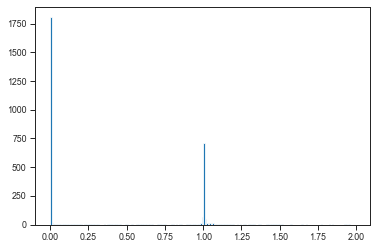

In [310]:
plt.hist(np.abs(np.diag(r)), bins=np.arange(0,2,0.01))
plt.show()

In [331]:
(np.abs(np.diag(r)) > 3e-64).sum()

2547

In [313]:
np.linalg.matrix_rank(train_data['X'])

2548

In [353]:
arr.groupby('Series').apply(len)

Series
Bulges         6333
External          7
MisMatches     7556
TETRAloop      3557
TRIloop         964
VARloop           3
WatsonCrick    1276
dtype: int64

# Plot performance

In [472]:
pd.read_clipboard()

,Model,Parameters,Mode,RMSE_dH,RMSE_Tm,MAE_dH,MAE_Tm
0,k-NN,k=8,val,4.902,5.149,3.762,4.011
1,k-NN,k=8,test,4.931,5.180,3.709,4.030
2,OLS,1331 feature NN model,val,6.447,4.143,4.753,2.743
3,OLS,1331 feature NN model,test,6.472,4.065,4.770,2.746
4,GAT,3 conv layers,val,4.900,3.860,3.710,2.870
5,TransformerConv,3 conv layers,val,4.324,2.915,3.259,2.019


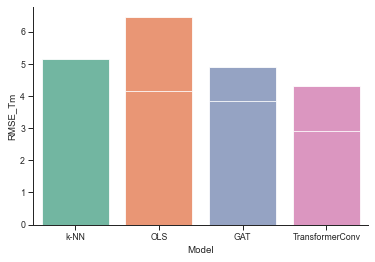

In [473]:
sns.barplot(data=pd.read_clipboard().query('Mode == "val"'), x='Model', y='RMSE_dH', palette='Set2')
sns.barplot(data=pd.read_clipboard().query('Mode == "val"'), x='Model', y='RMSE_Tm', palette='Set2')
sns.despine()

In [465]:
performance

NameError: name 'performance' is not defined

In [480]:
np.sqrt(np.square(arr.query('data_split == "val"').dH_se).mean())

2.715285324967969

In [481]:
arr.query('data_split == "val"').dH_se.mean()

2.537849035645225